1. đọc dữ liệu hiển thị các giá trị

a. kích thước và số chiều

In [17]:
import pandas as pd
#doc du lieu
dataframe= pd.read_excel('data.xlsx')
#hien thi kich thuoc va so chieu
df=pd.read_excel('data.xlsx',sheet_name='sheet2')
print(f'so chieu: {df.ndim}')
print(f'kich thuoc: {df.size}')




so chieu: 2
kich thuoc: 2478


b. so gia tri nhan

In [27]:
count=df.iloc[:,0].unique()
print(f'so nhan:{count}')

so nhan:[1 2 3]


c. tinh gia tri max,min,mean

In [28]:
decrip=df.describe()
print(decrip)

          1.00        14.23       1.71        2.43        15.60       127.00    
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000  \
mean     1.943503   12.993672    2.339887    2.366158   19.516949   99.587571   
std      0.773991    0.808808    1.119314    0.275080    3.336071   14.174018   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.360000    1.600000    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.870000    2.360000   19.500000   98.000000   
75%      3.000000   13.670000    3.100000    2.560000   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          2.80        3.06        0.28        2.29        5.64        1.04      
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000  \
mean     2.292260    2.023446    0.362316    1.586949    5.054802    0.956983   
std      0.626465    0.9986

In [35]:
from statistics import mean

avgmin_value=min(decrip)
avgmin=df.mean()
avgmax_value=max(decrip)
avgmax=df.mean()
avgmean_value=mean(decrip)
avgmean=df.mean()

print(f'gia tri min: {avgmin}')
print(f'gia tri max: {avgmax}')
print(f'gia tri mean: {avgmean}')



gia tri min: 1.00         1.943503
14.23       12.993672
1.71         2.339887
2.43         2.366158
15.60       19.516949
127.00      99.587571
2.80         2.292260
3.06         2.023446
0.28         0.362316
2.29         1.586949
5.64         5.054802
1.04         0.956983
3.92         2.604294
1065.00    745.096045
dtype: float64
gia tri max: 1.00         1.943503
14.23       12.993672
1.71         2.339887
2.43         2.366158
15.60       19.516949
127.00      99.587571
2.80         2.292260
3.06         2.023446
0.28         0.362316
2.29         1.586949
5.64         5.054802
1.04         0.956983
3.92         2.604294
1065.00    745.096045
dtype: float64


2. thu giam so chieu,hien thi khong gian 2 chieu

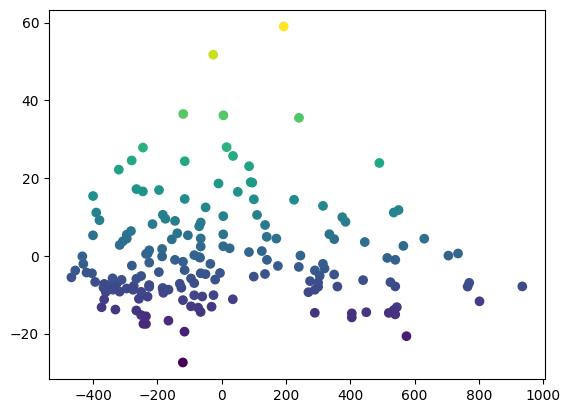

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#hien thi khong gian 2 chieu
pca=PCA(n_components=2)
x_reduced=pca.fit_transform(df)
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=x_reduced[:,1])
plt.show()

4. loai tru cot nhan

In [43]:
# import thư viện cho các model
from sklearn import datasets, svm, metrics,neighbors,linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [45]:
names = [
    "knn",
    # "LogisticRegression",
    "Linear SVM",
    # "RBF SVM",
    # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    # "Neural Net",
    # "AdaBoost",
    "Naive Bayes",
    # "QDA",
]

models = [
    neighbors.KNeighborsClassifier(),
    # linear_model.LogisticRegression(max_iter=1000),
    SVC(kernel="linear", C=0.025),
    # SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    # MLPClassifier(alpha=1, max_iter=1000),
    # AdaBoostClassifier(),
    GaussianNB(),
    # QuadraticDiscriminantAnalysis(),
]


In [47]:
f1_score_result =[]
accuracy_score_result =[]

for name,model in zip(names,models): 
    clf = model

    X_train, X_test, y_train, y_test = train_test_split(
        df.iloc[:,1:], df.iloc[:,0], train_size=0.75,test_size=0.25)

    clf.fit(X_train, y_train)

    predicted = clf.predict(X_test)

    acc = accuracy_score(y_true=y_test,y_pred=predicted)
    f1 = f1_score(y_true=y_test,y_pred=predicted,average='macro')
    

    f1_score_result.append(f1)
    accuracy_score_result.append(acc)

print(f1_score_result)
print(accuracy_score_result)

[0.7304207385508198, 1.0, 0.8851540616246498, 0.934126984126984, 0.9566666666666667]
[0.7333333333333333, 1.0, 0.8888888888888888, 0.9333333333333333, 0.9555555555555556]


<BarContainer object of 5 artists>

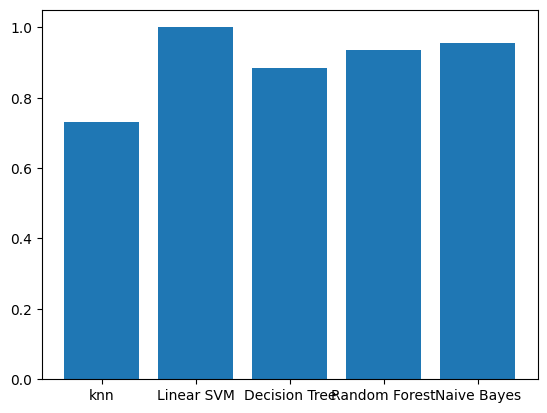

In [48]:
plt.bar(names,f1_score_result)

<BarContainer object of 5 artists>

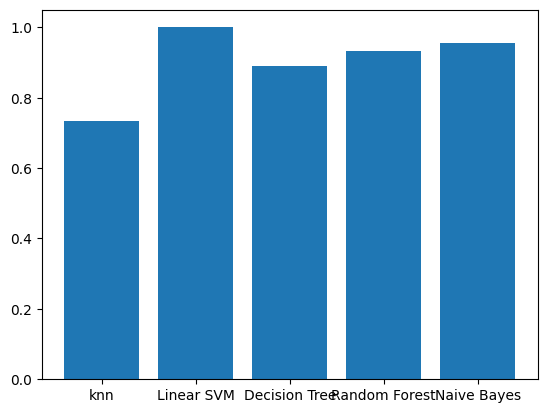

In [49]:
plt.bar(names,accuracy_score_result)

4. cau4


In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
feature=df.iloc[:,1]
kmeans.fit(feature)
predicted_labels = kmeans.labels_ +1
print('label: ',list(df.iloc[:,0]))
print('predicted',predicted_labels)
for i in range(len(predicted_labels)):
    print('predict: ',predicted_labels[i])



ValueError: Expected 2D array, got 1D array instead:
array=[13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12 13.75
 14.75 14.38 13.63 14.3  13.83 14.19 13.64 14.06 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.05 13.07 14.22 13.56 13.41 13.88 13.24 13.05 14.21 14.38 13.9  14.1
 13.94 13.05 13.83 13.82 13.77 13.74 13.56 14.22 13.29 13.72 12.37 12.33
 12.64 13.67 12.37 12.17 12.37 13.11 12.37 13.34 12.21 12.29 13.86 13.49
 12.99 11.96 11.66 13.03 11.84 12.33 12.7  12.   12.72 12.08 13.05 11.84
 12.67 12.16 11.65 11.64 12.08 12.08 12.   12.69 12.29 11.62 12.47 11.81
 12.29 12.37 12.29 12.08 12.6  12.34 11.82 12.51 12.42 12.25 12.72 12.22
 11.61 11.46 12.52 11.76 11.41 12.08 11.03 11.82 12.42 12.77 12.   11.45
 11.56 12.42 13.05 11.87 12.07 12.43 11.79 12.37 12.04 12.86 12.88 12.81
 12.7  12.51 12.6  12.25 12.53 13.49 12.84 12.93 13.36 13.52 13.62 12.25
 13.16 13.88 12.87 13.32 13.08 13.5  12.79 13.11 13.23 12.58 13.17 13.84
 12.45 14.34 13.48 12.36 13.69 12.85 12.96 13.78 13.73 13.45 12.82 13.58
 13.4  12.2  12.77 14.16 13.71 13.4  13.27 13.17 14.13].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.